<a href="https://colab.research.google.com/github/noaihere/encyclepedia_python/blob/main/seaborn_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run notebook cna_covid_data.ipynb to get downloaded csv 

Read in csv data and plot seaborn charts


In [1]:
# upload csv

from google.colab import files
uploaded = files.upload()

Saving final2021.csv to final2021.csv


read in data
https://towardsdatascience.com/google-colab-import-and-export-datasets-eccf801e2971

In [2]:
# read in data and create pandas df

import pandas as pd
df = pd.read_csv("final2021.csv")
df.tail()

,date,communitycases,dormresidents,importedcases
109,2021-04-21,1,0,14
110,2021-04-22,1,1,22
111,2021-04-23,2,1,36
112,2021-04-24,5,0,18
113,2021-04-25,0,0,40


In [3]:
print(df.dtypes)
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date              object
communitycases     int64
dormresidents      int64
importedcases      int64
dtype: object


date              datetime64[ns]
communitycases             int64
dormresidents              int64
importedcases              int64
dtype: object

Step one. 

Identify whether you want to plot a graph on

**Relationships involving numeric variables**

Step two.

Use appropriate seaborn function for corresponding type identified in step 1

**Want to plot line chart so will use sns.relplot**

In [4]:
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime
from matplotlib import cycler
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

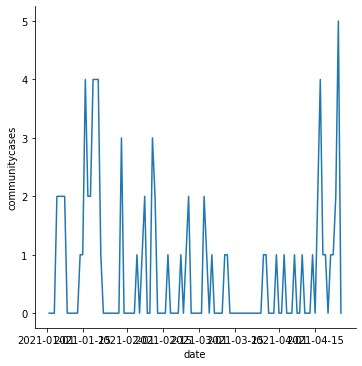

In [5]:
h = sns.relplot(x="date", y="communitycases", kind="line", data=df)

Step three.

Do further customizations to the graph

**Looks damn ugly now**

3a) **Edit the style of the graph using set_theme**

Can edit axes, grid, xtick, ytick, patch, lines

See https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.11-Settings-and-Stylesheets.ipynb#scrollTo=Y5FP5lwcD_wo

Full options found in
sns.axes_style(), 
sns.plotting_context()

or see the specific chart type 
example line https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

https://towardsdatascience.com/everything-about-plotting-in-python-c12ccdc359bc


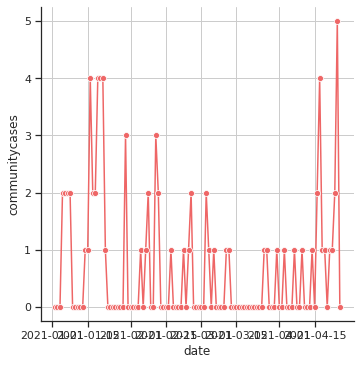

In [6]:
# change style to include ticks at axes 
# add marker to lines
# add grid 
# change color of line

sns.set_theme(style='ticks',rc={"axes.grid":True, "lines.marker":"o", "axes.prop_cycle":cycler('color',["#EE6666"])})
h = sns.relplot(x="date", y="communitycases", kind="line", data=df)

3b) **Edit figure using fig attribute of facetgrid**

https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html

See all attributes of facetgrid at

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

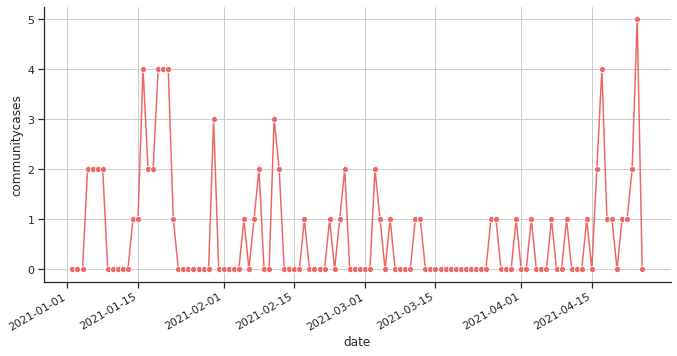

In [7]:
# format x axis to handle datetime
# increase width of figure

sns.set_theme(style='ticks',rc={"axes.grid":True, "lines.marker":"o", "xtick.bottom":True, "axes.prop_cycle":cycler('color',["#EE6666"])})
h = sns.relplot(x="date", y="communitycases", kind="line", data=df)

h.fig.autofmt_xdate()
h.fig.set_figwidth(10)

3c) **Edit other aspects of the chart** using instance methods of h.ax (AxesSubplot object)
https://matplotlib.org/stable/api/axes_api.html#subplots

Title of chart, 
xlim, ylim, 
xlabel, ylabel,  
legend

In [8]:
type(h.ax)

matplotlib.axes._subplots.AxesSubplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


Text(19.334999999999994, 0.5, 'Community cases')

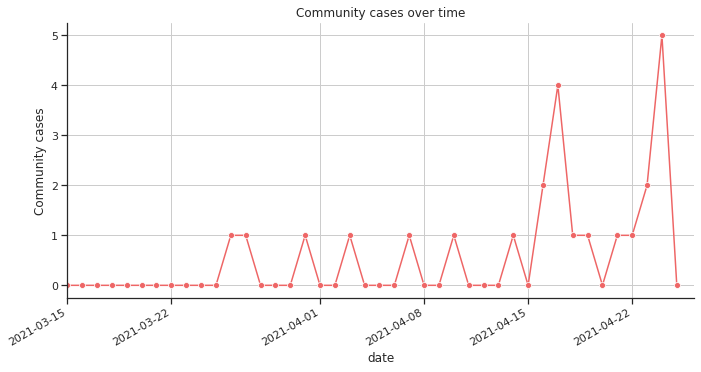

In [9]:
# set x lim to restrict date range
# set title of chart
# set y axis label

sns.set_theme(style='ticks',rc={"axes.grid":True, "lines.marker":"o", "xtick.bottom":True, "axes.prop_cycle":cycler('color',["#EE6666"])})
h = sns.relplot(x="date", y="communitycases", kind="line", data=df)
h.fig.autofmt_xdate()
h.fig.set_figwidth(10)

h.ax.set_xlim([datetime.date(2021,3,15),pd.datetime.now()])
h.ax.set_title('Community cases over time')
h.ax.set_ylabel('Community cases')

3d) **Edit x and y axis using h.ax.axis**

https://matplotlib.org/stable/api/axis_api.html

In [10]:
type(h.ax.xaxis)

matplotlib.axis.XAxis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


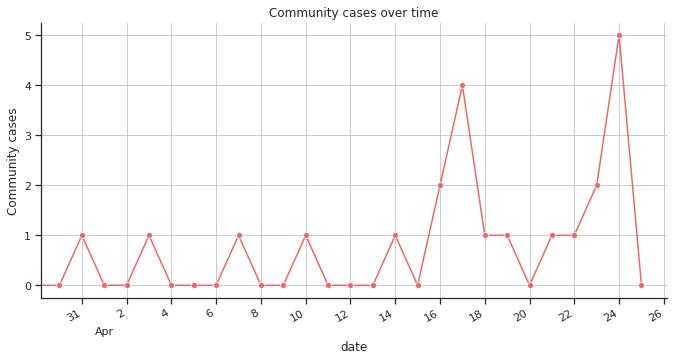

In [11]:
# add major and miner ticks for days and months
# format them

sns.set_theme(style='ticks',rc={"axes.grid":True, "lines.marker":"o", "xtick.bottom":True, "axes.prop_cycle":cycler('color',["#EE6666"])})
h = sns.relplot(x="date", y="communitycases", kind="line", data=df)
h.fig.autofmt_xdate()
h.fig.set_figwidth(10)
h.ax.set_xlim([pd.datetime.now()- pd.DateOffset(weeks=4),pd.datetime.now()])
h.ax.set_title('Community cases over time')
h.ax.set_ylabel('Community cases')

date_form = DateFormatter("%e")
h.ax.xaxis.set_major_formatter(date_form)
h.ax.xaxis.set_minor_formatter(DateFormatter("%b"))
h.ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
h.ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
h.ax.xaxis.set_tick_params(which='minor', pad=25, color='w', labelbottom=True)

# https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/

for each chart type. see additional like px.patches for hist


Objects of matplotlib
https://realpython.com/python-matplotlib-guide/

seaborn examples https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=Lcib3_hpaE3R

In [12]:
df_melt = df.melt(id_vars="date", var_name='type')
df_melt.tail(100)

,date,type,value
242,2021-01-16,importedcases,19
243,2021-01-17,importedcases,28
244,2021-01-18,importedcases,12
245,2021-01-19,importedcases,26
246,2021-01-20,importedcases,36
...,...,...,...
337,2021-04-21,importedcases,14
338,2021-04-22,importedcases,22
339,2021-04-23,importedcases,36
340,2021-04-24,importedcases,18


(0.0, 40.0)

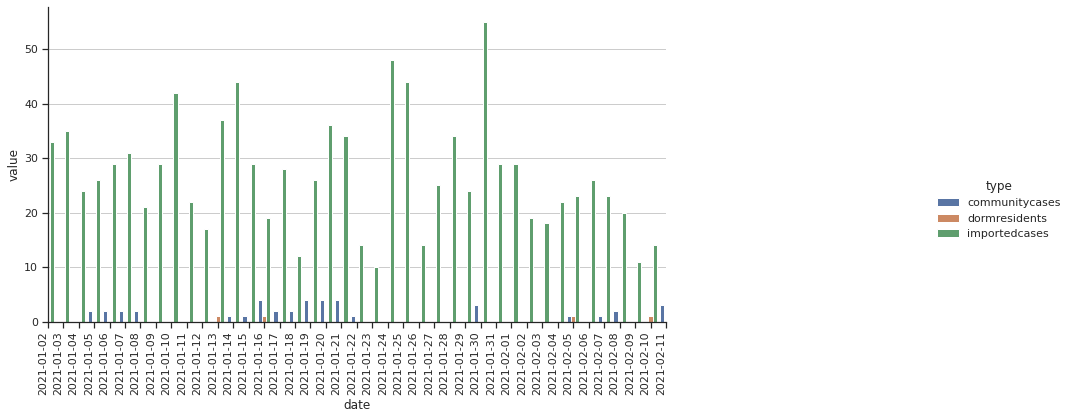

In [13]:
# get Bar Chart

sns.set_theme(style='ticks',rc={"axes.grid":True, "lines.marker":"o", "xtick.bottom":True})
f = sns.catplot(kind='bar',data=df_melt, x='date',y='value',hue="type")

f.fig.set_figwidth(20)
x_dates = df_melt['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
f.ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')
f.ax.set_xlim([0,40])

# https://stackoverflow.com/questions/63182997/seaborn-bar-plot-with-dates-as-x-axis

2021-04-26
72
114


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


(72.0, 114.0)

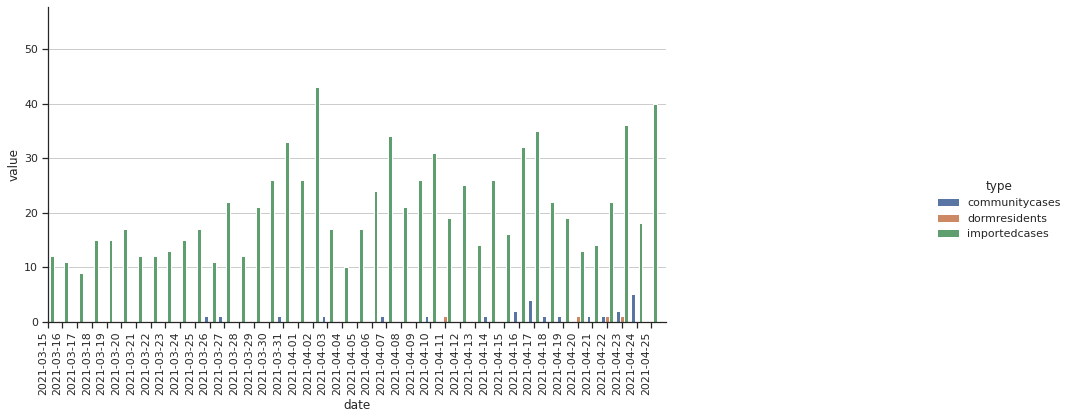

In [14]:
# get Bar Chart but not hard code index

sns.set_theme(style='ticks',rc={"axes.grid":True, "lines.marker":"o", "xtick.bottom":True})
f = sns.catplot(kind='bar',data=df_melt, x='date',y='value',hue="type")

f.fig.set_figwidth(20)
x_dates = df_melt['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
f.ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')

# get index of start and end date to limit chart 
start_date = '2021-03-15'
end_date = str(pd.datetime.now().strftime('%Y-%m-%d'))
print(end_date)
for tick in f.ax.get_xticklabels():
    if tick.get_text()==start_date:
        start_index = tick.get_position()[0]
    elif tick.get_text()==end_date:
        end_index = tick.get_position()[0]
    else:
        end_index = len(f.ax.get_xticklabels())        
print(start_index)
print(end_index)

f.ax.set_xlim([start_index, end_index])
# https://stackoverflow.com/questions/63182997/seaborn-bar-plot-with-dates-as-x-axis

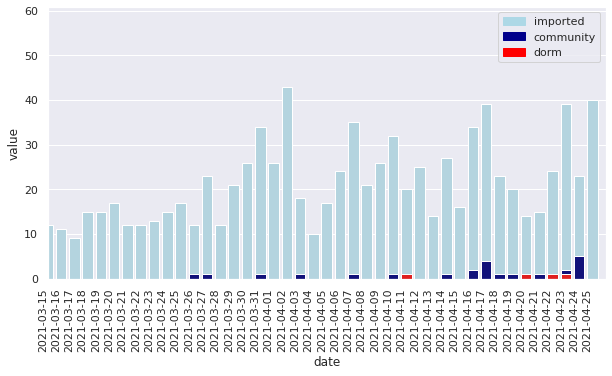

In [15]:
# get Stacked Bar Chart

sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))

# separate df
df_melt_community = df_melt.loc[df_melt['type']=='communitycases',:]
df_melt_dorm = df_melt.loc[df_melt['type']=='dormresidents',:]
total = df_melt.groupby('date')['value'].sum().reset_index()

# order matters. put total first
f = sns.barplot(data=total, x='date',y='value',color='lightblue')
f = sns.barplot(data=df_melt_community, x='date',y='value',color='darkblue')
f = sns.barplot(data=df_melt_dorm, x='date',y='value',color='red')

# for x axis
x_dates = df_melt_community['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
f.set_xticklabels(labels=x_dates, rotation=90, ha='right')
f.set_xlim([start_index, end_index])

# legend
top_bar = mpatches.Patch(color='lightblue', label='imported')
bottom_bar = mpatches.Patch(color='darkblue', label='community')
bottom_bar2 = mpatches.Patch(color='red', label='dorm')
f.legend(handles=[top_bar, bottom_bar,bottom_bar2])

# https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

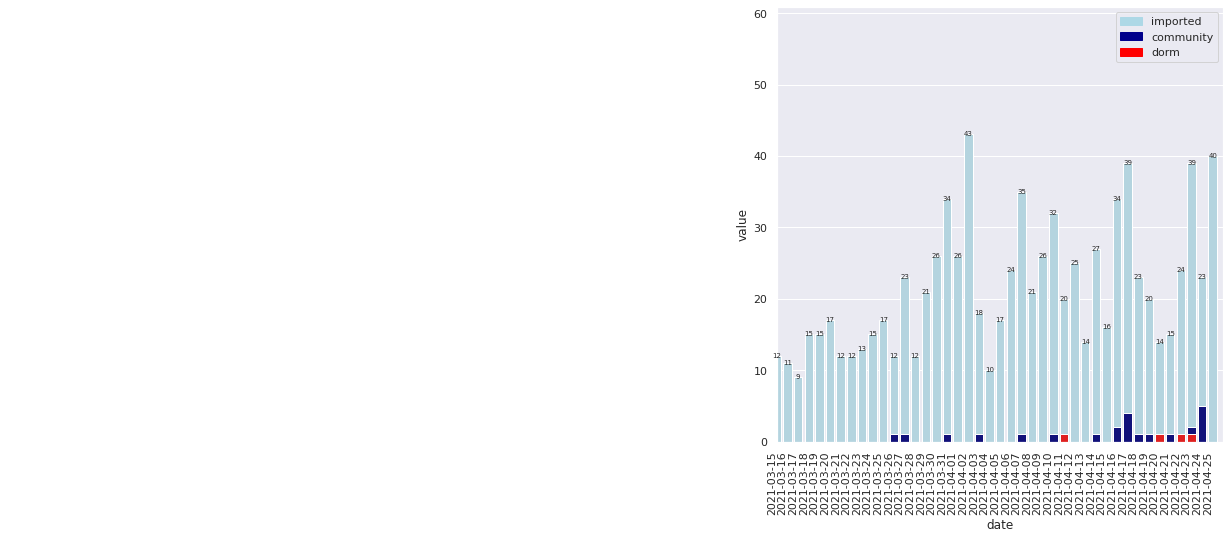

In [16]:
# get Stacked Bar Chart

sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))

# separate df
df_melt_community = df_melt.loc[df_melt['type']=='communitycases',:]
df_melt_dorm = df_melt.loc[df_melt['type']=='dormresidents',:]
total = df_melt.groupby('date')['value'].sum().reset_index()

# order matters. put total first
f = sns.barplot(data=total, x='date',y='value',color='lightblue')
f = sns.barplot(data=df_melt_community, x='date',y='value',color='darkblue')
f = sns.barplot(data=df_melt_dorm, x='date',y='value',color='red')

# for x axis
x_dates = df_melt_community['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
f.set_xticklabels(labels=x_dates, rotation=90, ha='right')
f.set_xlim([start_index, end_index])

# legend
top_bar = mpatches.Patch(color='lightblue', label='imported')
bottom_bar = mpatches.Patch(color='darkblue', label='community')
bottom_bar2 = mpatches.Patch(color='red', label='dorm')
f.legend(handles=[top_bar, bottom_bar,bottom_bar2])

# add data labels
for rect in f.patches:
    y_value = rect.get_height()
    x_value = rect.get_x()+rect.get_width()/2
    if y_value > 8:
        f.annotate(f"{y_value:.0f}",(x_value,y_value+0.5),ha='center',va='top', fontsize=7)

# https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

# https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


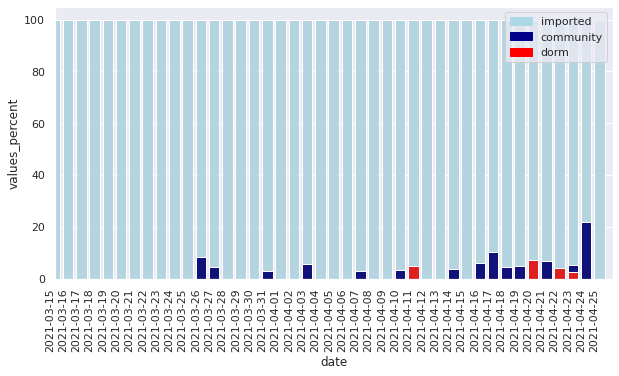

In [17]:
# get percentage of total for Percent Stacked Bar Chart

plt.figure(figsize=(10, 5))

# separate df
df_melt_community['values_percent'] = [i / j * 100 for i,j in zip(df_melt_community['value'], total['value'])]
df_melt_dorm['values_percent'] = [i / j * 100 for i,j in zip(df_melt_dorm['value'], total['value'])]
total['values_percent'] = [i / j * 100 for i,j in zip(total['value'], total['value'])]

f = sns.barplot(data=total, x='date',y='values_percent',color='lightblue')
f = sns.barplot(data=df_melt_community, x='date',y='values_percent',color='darkblue')
f = sns.barplot(data=df_melt_dorm, x='date',y='values_percent',color='red')

# for x axis
x_dates = df_melt_community['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
f.set_xticklabels(labels=x_dates, rotation=90, ha='right')
f.set_xlim([start_index, end_index])

# legend
top_bar = mpatches.Patch(color='lightblue', label='imported')
bottom_bar = mpatches.Patch(color='darkblue', label='community')
bottom_bar2 = mpatches.Patch(color='red', label='dorm')
f.legend(handles=[top_bar, bottom_bar,bottom_bar2])

In [18]:
# save figure
# open files on right side tab

fig = f.get_figure()
fig.savefig("test.png")
